In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Пользуемся данными ресурса https://www.imdb.com/interfaces/

In [2]:
df = pd.read_csv('title_basics.csv', sep='\t', dtype='unicode')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906049 entries, 0 to 5906048
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtypes: object(9)
memory usage: 405.5+ MB


In [3]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Анализируем распределение наблюдений в разрезе времени

In [4]:
df_types = df.filter(items=['titleType', 'startYear', 'tconst', 'isAdult', 'runtimeMinutes'])
df_types.startYear = pd.to_numeric(df.startYear, errors='coerce').fillna(0).astype(int)

In [5]:
df_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906049 entries, 0 to 5906048
Data columns (total 5 columns):
titleType         object
startYear         int64
tconst            object
isAdult           object
runtimeMinutes    object
dtypes: int64(1), object(4)
memory usage: 225.3+ MB


In [6]:
df_types.tail()

,titleType,startYear,tconst,isAdult,runtimeMinutes
5906044,tvEpisode,2010,tt9916848,0,\N
5906045,tvEpisode,2010,tt9916850,0,\N
5906046,tvEpisode,2010,tt9916852,0,\N
5906047,short,2015,tt9916856,0,27
5906048,tvEpisode,2014,tt9916880,0,\N


Отсекаем неправдивые данные.

In [7]:
df_types = df_types[df_types['startYear'] < 2019]
df_types = df_types[df_types['startYear'] != 0]

In [8]:
df_g1 = df_types.groupby(['startYear','titleType']).size().reset_index(name='counts')

In [9]:
df_g1.head()

,startYear,titleType,counts
0,1874,short,1
1,1878,short,1
2,1881,short,1
3,1883,short,1
4,1885,short,1


titleType
movie           AxesSubplot(0.125,0.125;0.775x0.755)
short           AxesSubplot(0.125,0.125;0.775x0.755)
tvEpisode       AxesSubplot(0.125,0.125;0.775x0.755)
tvMiniSeries    AxesSubplot(0.125,0.125;0.775x0.755)
tvMovie         AxesSubplot(0.125,0.125;0.775x0.755)
tvSeries        AxesSubplot(0.125,0.125;0.775x0.755)
tvShort         AxesSubplot(0.125,0.125;0.775x0.755)
tvSpecial       AxesSubplot(0.125,0.125;0.775x0.755)
video           AxesSubplot(0.125,0.125;0.775x0.755)
videoGame       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

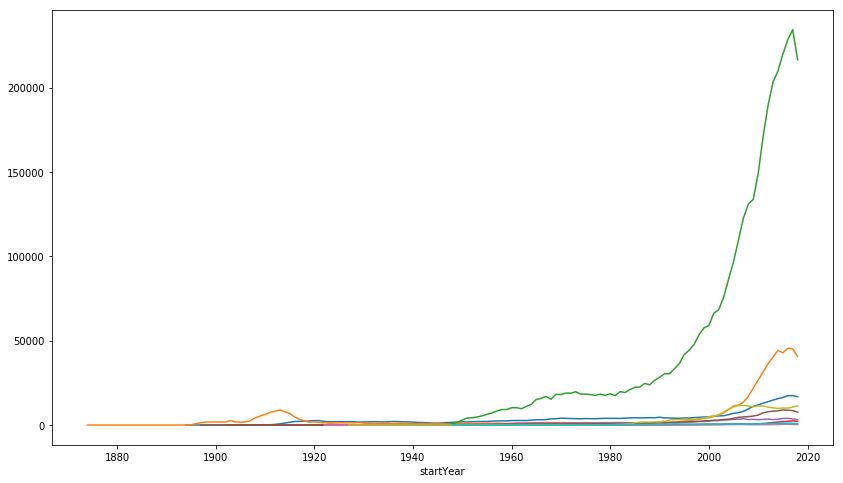

In [10]:
fig, ax = plt.subplots()
df_g1.groupby('titleType').plot(x='startYear', ax=ax, legend=False, figsize=(14, 8))

Наблюдаем, что примерно с 1950 года намечается тенденция к образованию актуальной картины.
Применяем соответствующий фильтр, для отсечения бесполезных данных.

In [11]:
df_types = df_types[df_types['startYear'] > 1950]
df_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256402 entries, 15495 to 5906048
Data columns (total 5 columns):
titleType         object
startYear         int64
tconst            object
isAdult           object
runtimeMinutes    object
dtypes: int64(1), object(4)
memory usage: 240.6+ MB


In [12]:
df_g1 = df_types.groupby(['startYear','titleType']).size().reset_index(name='counts')

titleType
movie           AxesSubplot(0.125,0.125;0.775x0.755)
short           AxesSubplot(0.125,0.125;0.775x0.755)
tvEpisode       AxesSubplot(0.125,0.125;0.775x0.755)
tvMiniSeries    AxesSubplot(0.125,0.125;0.775x0.755)
tvMovie         AxesSubplot(0.125,0.125;0.775x0.755)
tvSeries        AxesSubplot(0.125,0.125;0.775x0.755)
tvShort         AxesSubplot(0.125,0.125;0.775x0.755)
tvSpecial       AxesSubplot(0.125,0.125;0.775x0.755)
video           AxesSubplot(0.125,0.125;0.775x0.755)
videoGame       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

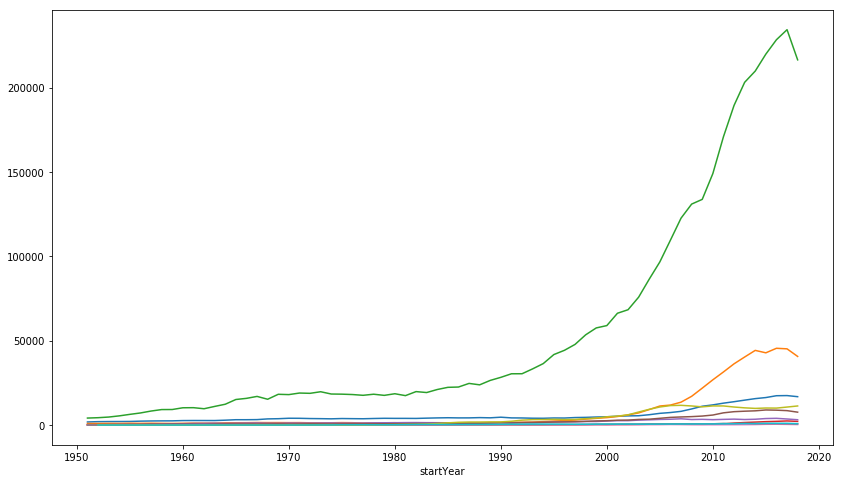

In [13]:
fig, ax = plt.subplots()
df_g1.groupby('titleType').plot(x='startYear', ax=ax, legend=False, figsize=(14, 8))

In [14]:
df_g1.groupby('titleType').describe()

counts                                                         \
              count          mean           std     min       25%      50%   
titleType                                                                    
movie          68.0   5599.941176   4169.448415  1821.0   3529.00   4061.0   
short          68.0   7825.794118  13154.951340   908.0   1216.00   1424.5   
tvEpisode      68.0  55405.161765  65893.627583  4132.0  16676.00  21695.5   
tvMiniSeries   68.0    352.838235    554.928760     3.0     75.50    173.5   
tvMovie        68.0   1747.735294   1046.040275    91.0   1143.75   1358.5   
tvSeries       68.0   2253.470588   2564.022810   252.0    617.75    961.5   
tvShort        68.0    142.441176     97.159721    13.0     75.25    111.0   
tvSpecial      68.0    290.485294    298.068683     7.0     66.75    144.5   
video          64.0   3556.296875   4336.915068     1.0     31.00   1699.5   
videoGame      53.0    429.886792    286.462084     1.0    172.00    479.0   

                                 startYear                                  \
                   75%       max     count         mean        std     min   
titleType                                                                    
movie          5270.75   17456.0      68.0  1984.500000  19.773720  1951.0   
short          5296.75   45488.0      68.0  1984.500000  19.773720  1951.0   
tvEpisode     66771.75  234317.0      68.0  1984.500000  19.773720  1951.0   
tvMiniSeries    307.00    2421.0      68.0  1984.500000  19.773720  1951.0   
tvMovie        2580.25    3974.0      68.0  1984.500000  19.773720  1951.0   
tvSeries       2877.25    8932.0      68.0  1984.500000  19.773720  1951.0   
tvShort         193.50     480.0      68.0  1984.500000  19.773720  1951.0   
tvSpecial       476.25    1094.0      68.0  1984.500000  19.773720  1951.0   
video          6466.75   11684.0      64.0  1986.390625  18.806126  1952.0   
videoGame       602.00    1030.0      53.0  1991.452830  16.504738  1952.0   

                                                
                  25%     50%      75%     max  
titleType                                       
movie         1967.75  1984.5  2001.25  2018.0  
short         1967.75  1984.5  2001.25  2018.0  
tvEpisode     1967.75  1984.5  2001.25  2018.0  
tvMiniSeries  1967.75  1984.5  2001.25  2018.0  
tvMovie       1967.75  1984.5  2001.25  2018.0  
tvSeries      1967.75  1984.5  2001.25  2018.0  
tvShort       1967.75  1984.5  2001.25  2018.0  
tvSpecial     1967.75  1984.5  2001.25  2018.0  
video         1970.75  1986.5  2002.25  2018.0  
videoGame     1979.00  1992.0  2005.00  2018.0

Самый насыщенные категории в 4-х позициях: movie, short, tvEpisode, video.
tvEpisode доминируют в общей массе контента, и имеют ярко выраженный тренд к росту.

Пробуем оценить рейтинги.

In [15]:
df2 = pd.read_csv('title_ratings.сsv', sep='\t', dtype='unicode')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939667 entries, 0 to 939666
Data columns (total 3 columns):
tconst           939667 non-null object
averageRating    939667 non-null object
numVotes         939667 non-null object
dtypes: object(3)
memory usage: 21.5+ MB


In [16]:
df2.numVotes = pd.to_numeric(df2.numVotes, errors='coerce').fillna(0).astype(int)
df2.averageRating = pd.to_numeric(df2.averageRating, errors='coerce').fillna(0).astype(float)

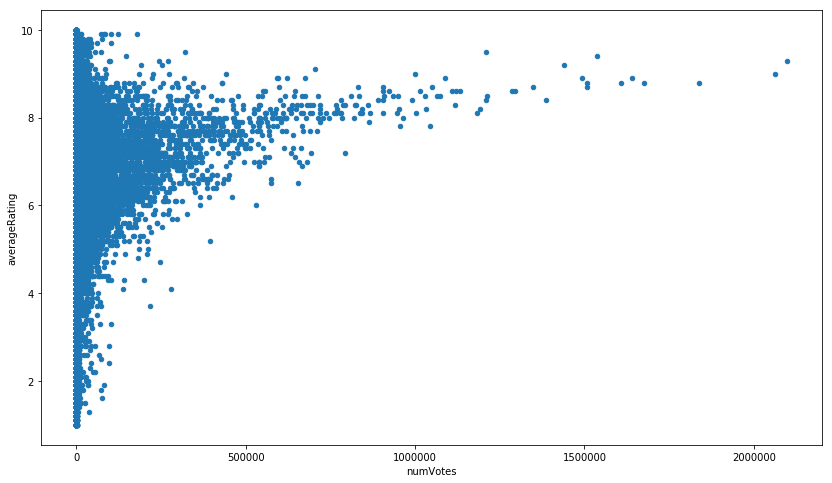

In [17]:
df2.plot(x='numVotes', y='averageRating', kind='scatter', figsize=(14, 8))

Наблюдаем, что больше голосуют за успешный контент. Т.е. количеством голосов может описывать популярность контента.
Объединяем датафреймы и пытаемся изучить данные.

In [18]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [19]:
df2.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1507
1,tt0000002,6.3,183
2,tt0000003,6.6,1154
3,tt0000004,6.3,112
4,tt0000005,6.2,1854


In [20]:
df3 = pd.merge(df, df2, on='tconst')

In [21]:
df3.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1507
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.3,183
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1154
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.3,112
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1854


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939667 entries, 0 to 939666
Data columns (total 11 columns):
tconst            939667 non-null object
titleType         939667 non-null object
primaryTitle      939667 non-null object
originalTitle     939667 non-null object
isAdult           939667 non-null object
startYear         939667 non-null object
endYear           939667 non-null object
runtimeMinutes    939667 non-null object
genres            939667 non-null object
averageRating     939667 non-null float64
numVotes          939667 non-null int64
dtypes: float64(1), int64(1), object(9)
memory usage: 86.0+ MB


Анализируем самую поппулярную категорию - tvEpisode.

In [23]:
df3.runtimeMinutes = pd.to_numeric(df3.runtimeMinutes, errors='coerce').fillna(0).astype(int)
df3.isAdult = pd.to_numeric(df3.isAdult, errors='coerce').fillna(0).astype(bool)

In [24]:
df4 = df3[df3['titleType'] == 'tvEpisode']

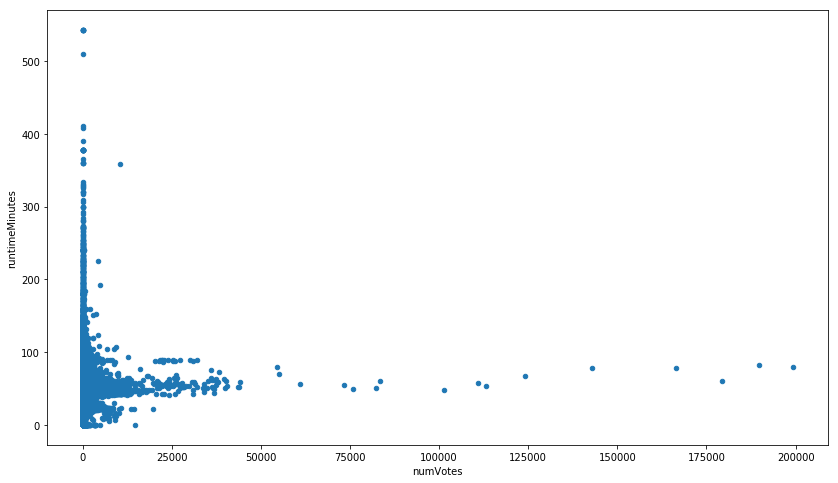

In [25]:
df4.plot(x='numVotes', y='runtimeMinutes', kind='scatter', figsize=(14, 8))

In [26]:
df4.describe()

,runtimeMinutes,averageRating,numVotes
count,409355.000000,409355.000000,409355.000000
mean,23.922185,7.399345,133.297473
std,24.177873,1.211490,1011.994575
min,0.000000,1.000000,5.000000
25%,0.000000,6.800000,8.000000
50%,23.000000,7.600000,16.000000
75%,43.000000,8.200000,54.000000
max,543.000000,10.000000,199201.000000


#### Самые ожидаемый контент сериями продолжительностью от 40 минут.

Добавляем информацию по регионам и изучаем ситуацию в регионе RU.

In [27]:
df5 = pd.read_csv('title_akas.csv', sep='\t', dtype='unicode')
df5 = df5.rename(columns={'titleId': 'tconst'})
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672726 entries, 0 to 3672725
Data columns (total 8 columns):
tconst             object
ordering           object
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtypes: object(8)
memory usage: 224.2+ MB


In [28]:
df5 = pd.merge(df3, df5, on='tconst')

In [39]:
df5.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
1896979,tt9875852,movie,The House Elf,Domovoy,False,2019,\N,90,"Comedy,Family,Fantasy",5.8,45,3,Домовой,RU,\N,\N,\N,0
1896981,tt9876160,movie,Koridor bessmertiya,Koridor bessmertiya,False,2019,\N,125,\N,6.6,20,2,Коридор бессмертия,RU,\N,\N,\N,0
1897012,tt9883346,tvSeries,The Helpful Fox Senko-san,Sewayaki Kitsune no Senko-san,False,2019,\N,23,"Animation,Comedy,Fantasy",7.8,46,3,Заботливая 800-летняя жена!,RU,\N,\N,\N,0
1897022,tt9886950,tvSeries,Well-Intended Love,Well-Intended Love,False,2019,2019,45,"Drama,Romance",7.6,105,1,Мой босс хочет на мне жениться,RU,\N,\N,\N,0
1897101,tt9914458,video,Alien Messiah,Alien Messiah,False,2019,\N,75,Sci-Fi,2.5,34,3,Пришелец Мессия,RU,\N,\N,\N,0


In [30]:
df5 = df5[df5['region'] == 'RU']

In [31]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42099 entries, 2 to 1897101
Data columns (total 18 columns):
tconst             42099 non-null object
titleType          42099 non-null object
primaryTitle       42099 non-null object
originalTitle      42099 non-null object
isAdult            42099 non-null bool
startYear          42099 non-null object
endYear            42099 non-null object
runtimeMinutes     42099 non-null int64
genres             42099 non-null object
averageRating      42099 non-null float64
numVotes           42099 non-null int64
ordering           42099 non-null object
title              42099 non-null object
region             42099 non-null object
language           42099 non-null object
types              42099 non-null object
attributes         42099 non-null object
isOriginalTitle    42099 non-null object
dtypes: bool(1), float64(1), int64(2), object(14)
memory usage: 5.8+ MB


In [32]:
df5_1 = df5.groupby(['startYear','titleType']).size().reset_index(name='counts')

titleType
movie           AxesSubplot(0.125,0.125;0.775x0.755)
short           AxesSubplot(0.125,0.125;0.775x0.755)
tvEpisode       AxesSubplot(0.125,0.125;0.775x0.755)
tvMiniSeries    AxesSubplot(0.125,0.125;0.775x0.755)
tvMovie         AxesSubplot(0.125,0.125;0.775x0.755)
tvSeries        AxesSubplot(0.125,0.125;0.775x0.755)
tvShort         AxesSubplot(0.125,0.125;0.775x0.755)
tvSpecial       AxesSubplot(0.125,0.125;0.775x0.755)
video           AxesSubplot(0.125,0.125;0.775x0.755)
videoGame       AxesSubplot(0.125,0.125;0.775x0.755)
Name: counts, dtype: object

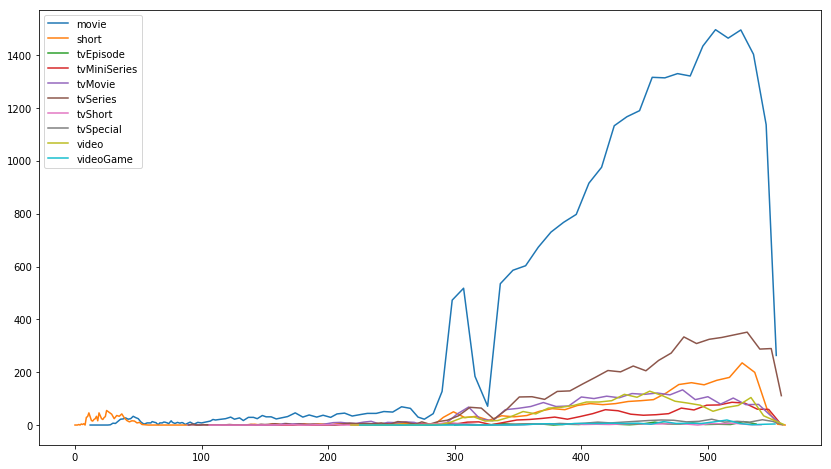

In [33]:
fig, ax = plt.subplots()
df5_1.groupby('titleType')['counts'].plot(x='startYear', ax=ax, legend=True, figsize=(14, 8))

In [34]:
df5_1.groupby('titleType').describe()

counts                                                         
              count        mean         std  min   25%   50%     75%     max
titleType                                                                   
movie         113.0  241.017699  443.566753  1.0  11.0  28.0   70.00  1495.0
short         114.0   30.122807   46.446875  1.0   2.0   6.5   35.50   236.0
tvEpisode      25.0    4.920000    3.239341  1.0   3.0   4.0    5.00    14.0
tvMiniSeries   47.0   24.510638   26.855388  1.0   2.0  12.0   43.00    87.0
tvMovie        58.0   40.948276   44.493020  1.0   4.0  11.5   78.75   134.0
tvSeries       70.0   77.128571  112.723198  1.0   3.0   6.5  124.00   352.0
tvShort        43.0    3.255814    2.268763  1.0   1.0   3.0    5.00    11.0
tvSpecial      30.0    9.466667    6.821535  1.0   4.0   8.5   15.00    23.0
video          37.0   48.702703   40.790021  1.0   4.0  43.0   84.00   129.0
videoGame      25.0    6.200000    4.462809  1.0   3.0   7.0    7.00    20.0

#### В регион RU существует общий тренд к росту производства контента, но наибольший уклон в сторону movie и tvSeries.

In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42099 entries, 2 to 1897101
Data columns (total 18 columns):
tconst             42099 non-null object
titleType          42099 non-null object
primaryTitle       42099 non-null object
originalTitle      42099 non-null object
isAdult            42099 non-null bool
startYear          42099 non-null object
endYear            42099 non-null object
runtimeMinutes     42099 non-null int64
genres             42099 non-null object
averageRating      42099 non-null float64
numVotes           42099 non-null int64
ordering           42099 non-null object
title              42099 non-null object
region             42099 non-null object
language           42099 non-null object
types              42099 non-null object
attributes         42099 non-null object
isOriginalTitle    42099 non-null object
dtypes: bool(1), float64(1), int64(2), object(14)
memory usage: 5.8+ MB


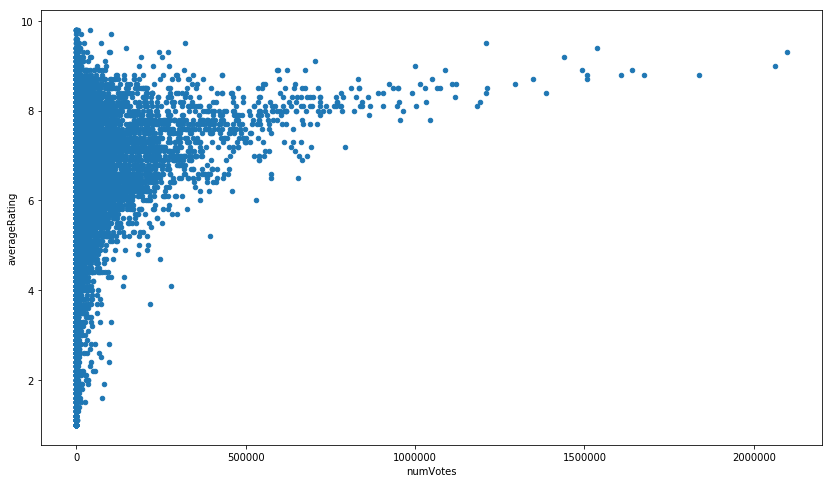

In [36]:
df5.plot(x='numVotes', y='averageRating', kind='scatter', figsize=(14, 8))

In [37]:
df5.describe()

,runtimeMinutes,averageRating,numVotes
count,42099.000000,42099.000000,4.209900e+04
mean,84.964251,6.337678,1.687137e+04
std,64.507929,1.365228,6.988608e+04
min,0.000000,1.000000,5.000000e+00
25%,60.000000,5.600000,3.460000e+02
50%,91.000000,6.500000,1.435000e+03
75%,105.000000,7.300000,5.186000e+03
max,3900.000000,9.800000,2.096697e+06


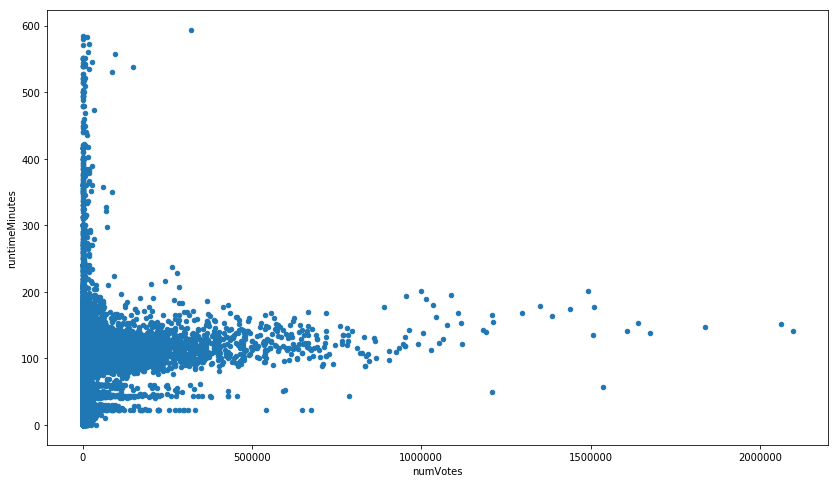

In [38]:
df5 = df5[df5['runtimeMinutes'] < 600]
df5.plot(x='numVotes', y='runtimeMinutes', kind='scatter', figsize=(14, 8))

#### В регионе RU самые распрастранный контент сериями продолжительностью от 105 минут.

### Итоги анализа
#### Регион RU развивается не в общем мировом тренде, и создает в большинстве полнометражные картины, которые в целом пользуются популярностью внутри региона, но на мировой арене спрос на продукт изменился в 1990-1995 году. Вектор развития региона не позволит создать свой голивуд, т.к. не совпадает с мировыми потребностями в контенте. В разрезе времени продукт региона, в международном актуальном продукте, занимает все меньшую долю с каждым годом.